<a href="https://colab.research.google.com/github/LuisBGodoi/Portfolio/blob/main/Igualdade_Salarial_Montgomery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📖 Background

[Montogmery](https://pt.wikipedia.org/wiki/Montgomery_(Alabama)) é a capital do estado do Alabama, localizado no Sul dos Estados Unidos, próximo a costa leste. Conhecida como capital dos sonhos a cidade tem aproximadamente 200.000 habitantes (dados de 2020). É uma cidade com muitos marcos históricos importantes da Guerra Civil Americana e a grande maioria dos locais da trilha dos direitos civis do país

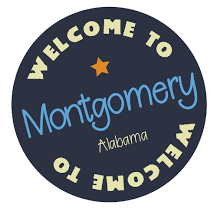

Vamos realizar uma estudo para verificar se existe uma diferença entre os salários entre homens e mulheres. Em uma cidade conhecida como o Berço dos Direitos Civis e que foi uma das primeiras a lutar contra a desigualdade racial, acredito que a igualdade de genêro também deve ser uma valor importante.

De acordo com o relatório ["The Simple Truth About the Gender Pay Gap"](https://www.aauw.org/resources/research/simple-truth/) estima-se que a cada um dolar pago para um homem a mulher ganha apenas 83 cents.Esse tem sido um tema cada vez mais presente no cotidiano das grande empresas, que tem como objetivo adquirir sustentabilidade nos fatores ESG, esses fatores são importantes porque está diretamente ligado com a satisfação dos empregados, deste modo se preocupando com esses fatores haverá uma retenção maior de funcionários, economizando dinheiro e tempo com treinamento e retendo talentos. Outro fator importante para que esse assunto seja tão importante é que segundo as leis norte americanas [(Equal Pay Act of 1963)](https://www.eeoc.gov/statutes/equal-pay-act-1963) homens e mulheres devem ser igualmente remunerados se desempenharem trabalhos iguais, porém, para um trabalho ser reconhecido como igual ao de outra pessoa as habilidades envolvidas devem ser as mesmas, assim como esforço, responsabilidade, condições de trabalho e localizado no mesmo estabelecimento.

##💾 The data

In [2]:
#Importando bibliotecas para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Vamos importar um arquivo do governo dos EUA obtido através do [link](https://catalog.data.gov/dataset/employee-salaries-2019), relativo aos salários das pessoas do condado de Montgomery situado dentro do estado de Maryland nos EUA.

In [3]:
df = pd.read_csv('/content/Employee_Salaries_-_2019.csv')
print("O formato do DataFrame:", df.shape)

O formato do DataFrame: (10105, 8)


Dicionário de Variáveis

Esse arquivo possui 8 colunas, sendo elas:


*   Department: Sigla do departamento do colaborador
  *   37 departamentos

*   Department Name: Nome do departamento
  *   37 nomes de departamentos

*   Divison: Divisao do colaborador
  *   705 divisões
  
*   Gender: Gênero
  *   F - feminino
  *   M - Masculino

*   Base Salary: Salário Anual em USD
*   2019 Overtime Pay: Pagamento realizado sobre horas extras em 2019
*   2019 Longevity Pay: Incentivo a longo prazo pago em 2019
*   Grade: Agrupamento realizado de acordo com o seu salário


In [4]:
df.head()

,Department,Department Name,Division,Gender,Base Salary,2019 Overtime Pay,2019 Longevity Pay,Grade
0,BOA,Board of Appeals Department,Board of Appeals Division,F,78902.00,0.0,0.0,18
1,BOA,Board of Appeals Department,Board of Appeals Division,F,58481.91,0.0,0.0,16
2,BOA,Board of Appeals Department,Executive Director,F,144751.00,0.0,0.0,M3
3,BOE,Board of Elections,Director,F,183654.18,0.0,0.0,M1
4,BOE,Board of Elections,Polling Place Management,F,62488.00,0.0,0.0,13


In [5]:
#verificação de valores nulos
df.isnull().sum()

Department            0
Department Name       0
Division              0
Gender                0
Base Salary           0
2019 Overtime Pay     0
2019 Longevity Pay    0
Grade                 0
dtype: int64

## ⛏Análise 

Para conseguirmos comparar os salários, vamos juntar o salário Base, com o pagamento por hora extra e pagamento por longevidade. E chamaremos de TTDC

In [6]:
#criar a coluna de TTDC
df["TTDC"] = df['Base Salary']+df['2019 Overtime Pay']+df['2019 Longevity Pay']
df.head()

,Department,Department Name,Division,Gender,Base Salary,2019 Overtime Pay,2019 Longevity Pay,Grade,TTDC
0,BOA,Board of Appeals Department,Board of Appeals Division,F,78902.00,0.0,0.0,18,78902.00
1,BOA,Board of Appeals Department,Board of Appeals Division,F,58481.91,0.0,0.0,16,58481.91
2,BOA,Board of Appeals Department,Executive Director,F,144751.00,0.0,0.0,M3,144751.00
3,BOE,Board of Elections,Director,F,183654.18,0.0,0.0,M1,183654.18
4,BOE,Board of Elections,Polling Place Management,F,62488.00,0.0,0.0,13,62488.00


Os grade são siglas que significam posições na mesma empresa, ou cargo semelhante, assim vou plotar a diferença percentual entre homens e mulheres no mesmo grade, assim podemos observar quem está ganhando mais. Valores negativos significa que os homens estão ganhando mais e positivo que as mulheres estão ganhando mais.

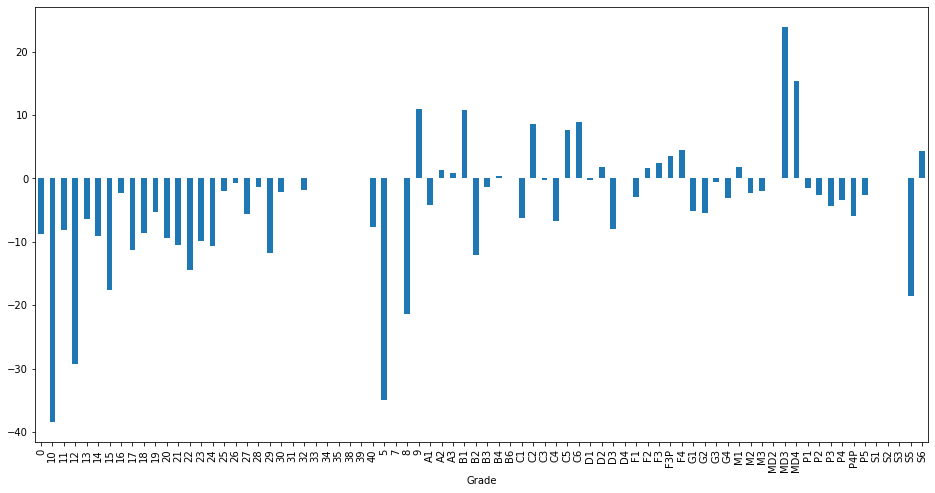

In [7]:
table_grade = pd.pivot_table(df,values='TTDC',index='Grade',columns='Gender',aggfunc=np.mean)
table_grade['Delta(%)'] = ((table_grade['F'] - table_grade['M'])/table_grade['M'])*100
table_grade['Delta(%)'].plot.bar(figsize=(16,8))

Visualmente é possivel identificar que na grande maioria dos casos os homens tem um TTDC médio maior que o das mulheres. 

Porém essa diferença pode ser devido a diferença de departamentos, afinal alguns departamentos tendem a ganhar mais que outros.

Para isso fiz a mesma comparação que fiz para grade só que agora para departamentos, para ver se conseguimos perceber um padrão diferente.

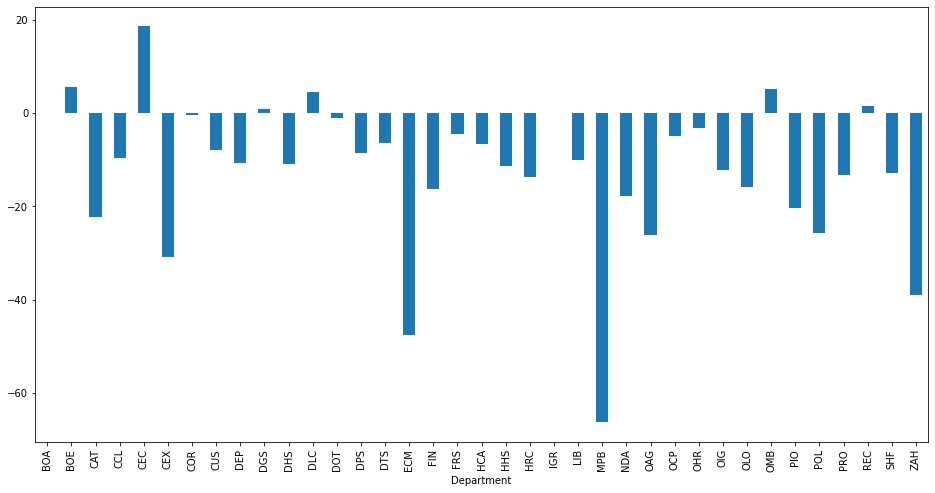

In [8]:
#criar uma tabela dinamica
table_departmento = pd.pivot_table(df,values='TTDC',index='Department',columns='Gender',aggfunc=np.mean)

table_departmento['Delta(%)'] = ((table_departmento['F'] - table_departmento['M'])/table_departmento['M'])*100
table_departmento['Delta(%)'].plot.bar(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

Podemos observar através desse gráfico que a diferença entre homens e mulheres na mesma divisão é muito maior na maioria dos Departamentos

Outra análise importante de se fazer é se as mulheres estão em minoria em cargos de alta responsabilidade, que adotaremos nesse caso como cargos de alta remuneração, para isso vamos fazer um contagem de homens e mulheres no diferentes grades. E iremos criar uma tabela com a média salarial de homens e mulheres por grade, para assim podermos ver quais grades tem os maiores salários e se neles há uma predominância masculina, ou se é bem distribuida.

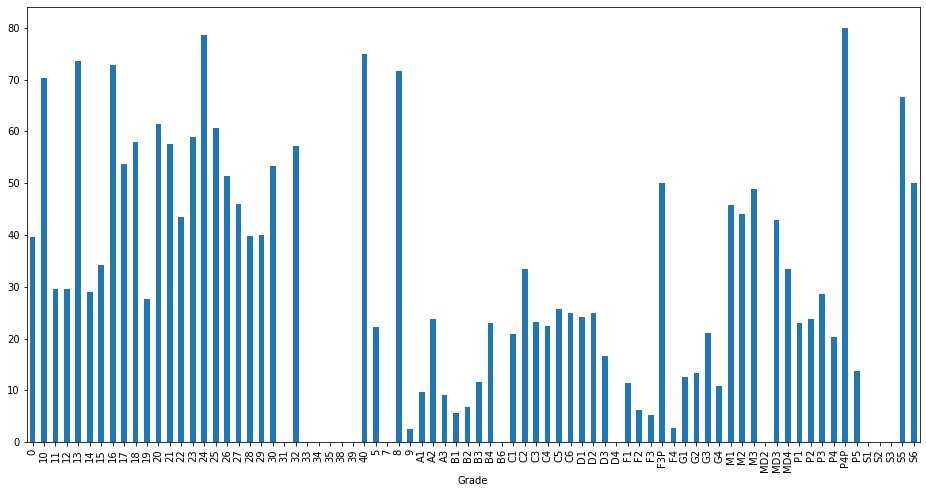

In [9]:
#Contando quantidade de homens e mulheres por grade
contagem_grade = pd.pivot_table(df,values='TTDC',index='Grade',columns='Gender',aggfunc='count')
contagem_grade['Delta'] = (contagem_grade['F']/(contagem_grade['F']+contagem_grade['M']))*100
contagem_grade['Delta'].plot.bar(figsize=(16,8))

In [16]:
table_grade = pd.pivot_table(df,values='TTDC',index='Grade',columns='Gender',aggfunc=np.mean)

table_grade.sort_values(by='M').head(20)

Gender,F,M
Grade,,
5,20902.055000,32080.882143
7,NaN,36242.150000
F3P,40170.000000,38812.000000
10,24118.342330,39155.308514
8,30890.079394,39304.752308
12,31745.076102,44823.694539
11,44535.729231,48468.770968
P4P,45746.702500,48624.360000
9,55150.230000,49719.341053


## 💡Conclusão
Através da observação nos gráficos de diferenã salarial média entre homens e mulheres percebemos que as mulheres estão ganhando menos que os homens, verificamos também com a tabela de porcentagem de mulheres dentro do grade e a tabela de média salarial por grade.
Outra análise que realizamos e é importante é a de menor porcentagem de mulheres em cargos de alta liderença, admitimos cargos de alta liderença como cargos de alta remunenração devido a falta de informações extras para classificar isso, nessa análise apesar de os dois cargos com maior média salárial terem poucas mulheres, os demais cargos recompensam isso, assim sendo, não podemos admitir que existe qualquer relação de que as mulheres do estudo estão deixando de pegar cargos altos devido ao sexo.
Deste modo, segundo a análise realizada o governo deveria revisar o salário das mulheres, vendo se elas devem receber um aumento, para com isso, aumentar a sua competitividade e evitar turnover e possiveis processos, visto que a lei obrigado o salário a ser igual.